<a href="https://colab.research.google.com/github/dottorm/teaching_synthetic/blob/main/synthetic_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Installing the package to generate synthetic data

In [1]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.2/145.2 kB 893.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 17.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Usi

import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

download the dataset and populate pandas dataframe

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
column_names = [
        'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
        'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed',
        'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'
    ]
data_orig = pd.read_csv(url, names=column_names,na_values='?')

print(data_orig.head())
print('----------------------\n')
print('DataFrame INFO')
print(data_orig.info())
print('----------------------\n')
print('Count null values')
print(data_orig.isnull().sum())

  Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

   ZipCode  Income Approved  
0    202.0       0        +  
1     43.0     560        +  
2    280

Check categorical columns

Normalize 'Approved' column


In [4]:
categorical = [var for var in data_orig.columns if data_orig[var].dtype == 'O']
print(" There are {} categorical variables \n".format(len(categorical)))
print(" The Categorical variables are :",categorical)

 There are 10 categorical variables 

 The Categorical variables are : ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approved']


Check numerical columns

In [5]:
numerical = [var for var in data_orig.columns if data_orig[var].dtype != 'O']
print(" There are {} numerical variables \n".format(len(numerical)))
print(" The numerical variables are :",numerical)

 There are 6 numerical variables 

 The numerical variables are : ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']


In [6]:
#Remove null values
data = data_orig.dropna()

In [7]:
data['Approved'].value_counts()

Approved
-    357
+    296
Name: count, dtype: int64

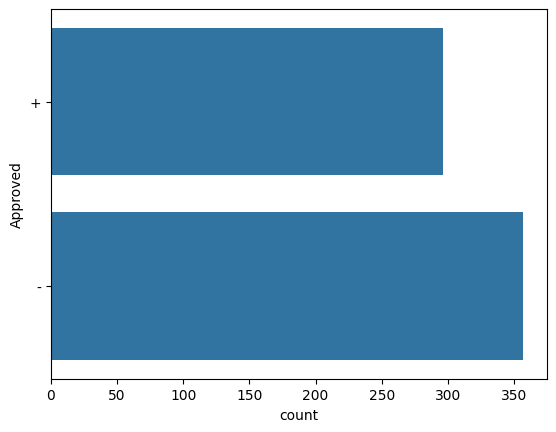

In [8]:
sns.countplot(data=data['Approved'])
plt.show()

<ipython-input-9-c4954e360549>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Income'])


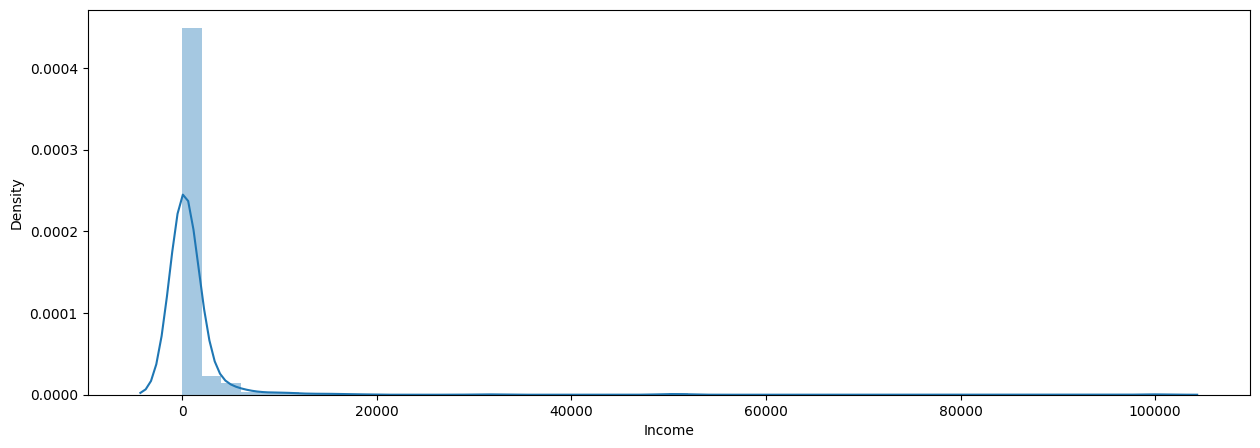

In [9]:
plt.subplots(figsize=(15,5))
sns.distplot(data['Income'])
plt.show()

<ipython-input-10-123bc41fe593>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Debt'],color='r')


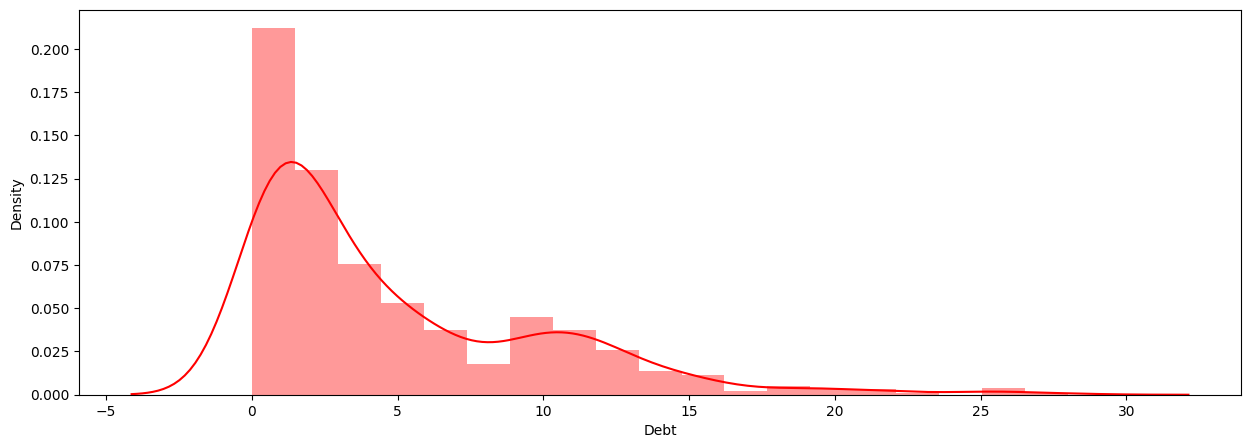

In [10]:
plt.subplots(figsize=(15,5))
sns.distplot(data['Debt'],color='r')
plt.show()

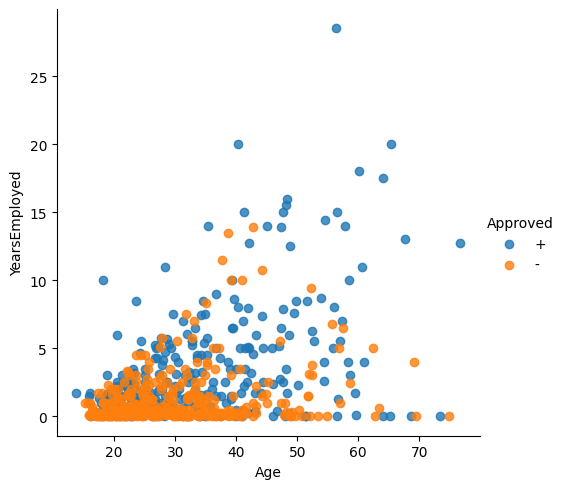

In [11]:
sns.lmplot(x="Age", y="YearsEmployed", data=data, hue="Approved", fit_reg=False)

<Axes: xlabel='Gender', ylabel='count'>

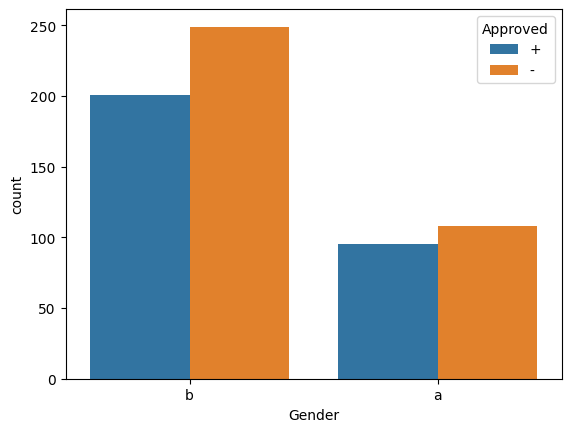

In [12]:
sns.countplot(x="Gender",hue="Approved",data=data)

In [13]:
print(data.groupby('Gender')['Approved'].count())

Gender
a    203
b    450
Name: Approved, dtype: int64


Correlation matrix

<Axes: >

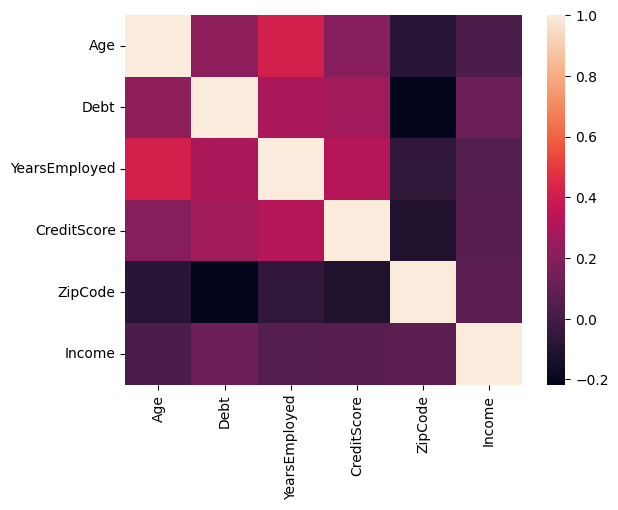

In [14]:
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix)

<Axes: xlabel='EducationLevel', ylabel='count'>

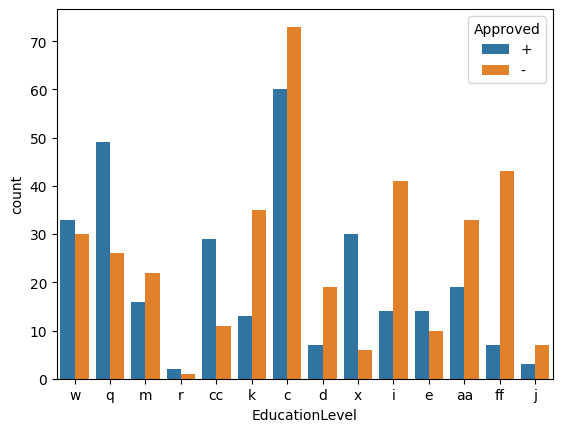

In [15]:
sns.countplot(x="EducationLevel",hue="Approved",data=data)

<Axes: xlabel='EducationLevel', ylabel='Income'>

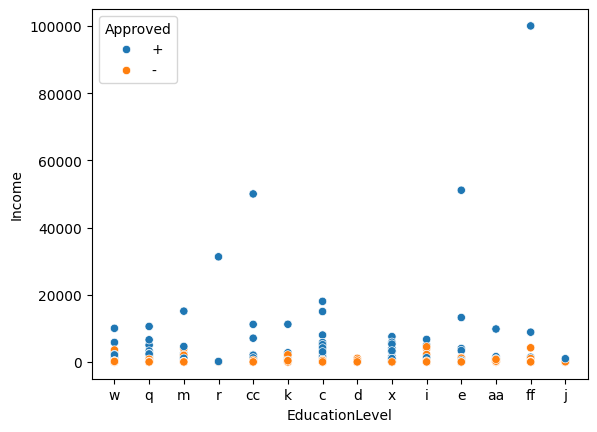

In [16]:

sns.scatterplot(data=data, x="EducationLevel", y="Income", hue="Approved")

<Axes: xlabel='Gender', ylabel='EducationLevel'>

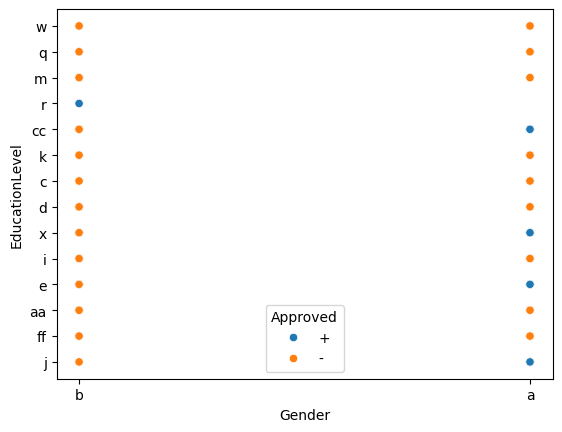

In [17]:
sns.scatterplot(data=data, x="Gender", y="EducationLevel", hue="Approved")

<Axes: xlabel='Ethnicity', ylabel='Income'>

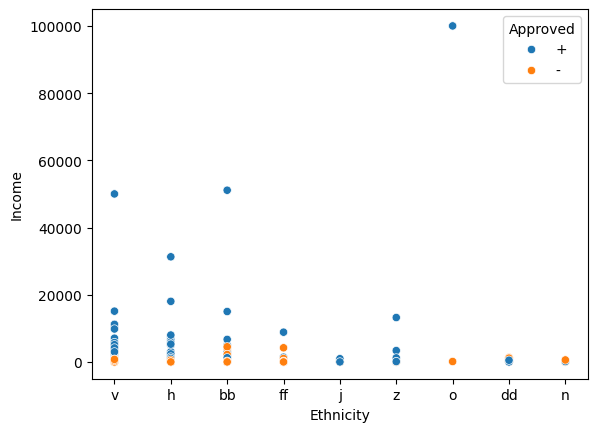

In [18]:
sns.scatterplot(data=data, x="Ethnicity", y="Income", hue="Approved")

<Axes: xlabel='Gender', ylabel='Ethnicity'>

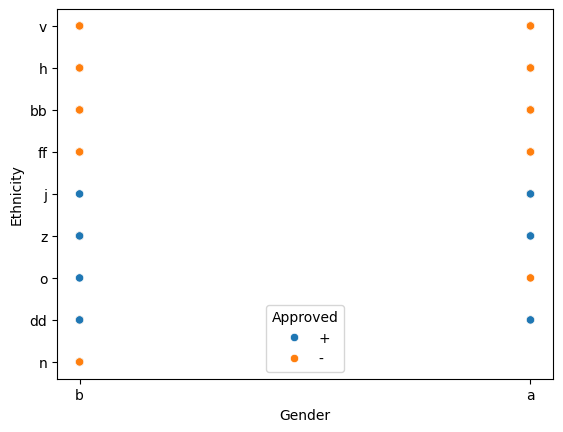

In [19]:
sns.scatterplot(data=data, x="Gender", y="Ethnicity", hue="Approved")

<Axes: xlabel='Ethnicity', ylabel='count'>

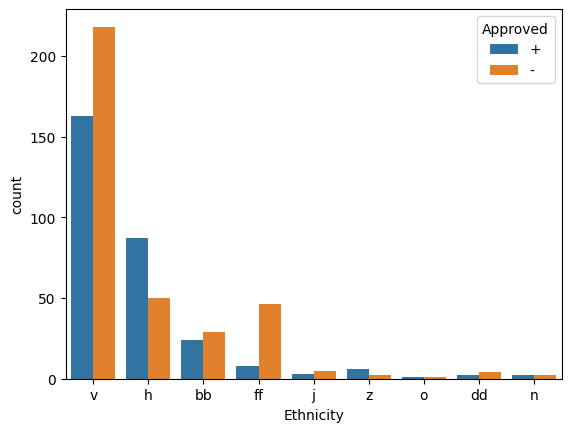

In [22]:
sns.countplot(data=data,x='Ethnicity',hue='Approved')

Synthetic data generation

In [26]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data_orig)

python_dict = metadata.to_dict()


synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(data_orig)
synthetic_data = synthesizer.sample(num_rows=689)
synthetic_data.head()
print('----------------------\n')
print('DataFrame INFO')
print(synthetic_data.info())
print('----------------------\n')
print('Count null values')
print(synthetic_data.isnull().sum())

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


----------------------

DataFrame INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          669 non-null    object 
 1   Age             676 non-null    float64
 2   Debt            689 non-null    float64
 3   Married         652 non-null    object 
 4   BankCustomer    640 non-null    object 
 5   EducationLevel  656 non-null    object 
 6   Ethnicity       647 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         677 non-null    float64
 14  Income          689 non-null    int64  
 15  Approved        689 non-null    object 
dtypes: float64(4), int64(2), object(10)
memor

In [28]:
synthetic_data['Approved'].value_counts()

Approved
+    397
-    292
Name: count, dtype: int64

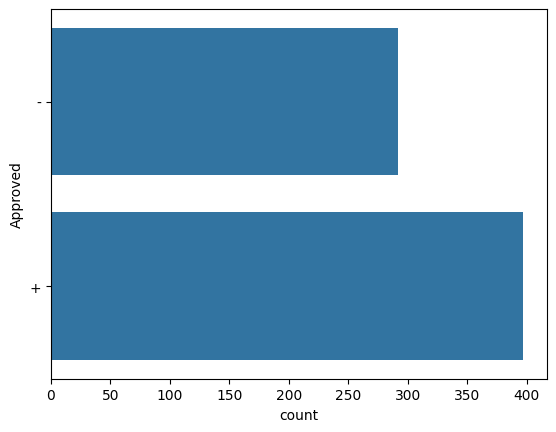

In [27]:
sns.countplot(data=synthetic_data['Approved'])
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

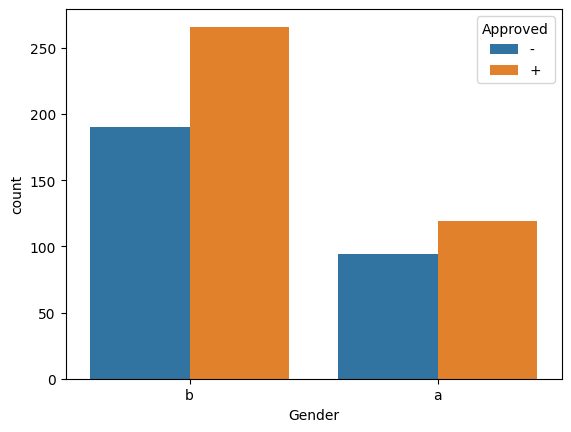

In [30]:
sns.countplot(x="Gender",hue="Approved",data=synthetic_data)

Handling null values

In [33]:
# Iterate over each column of df
for col in data_orig:
    # Check if the column is of object type
    if (data_orig[col].dtypes == 'object'):
        # Impute with the most frequent value / mode
        data_orig = data_orig.fillna(data_orig[col].value_counts().index[0])

print('Count null values')
print(data_orig.isnull().sum())

Count null values
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


Generate synthetic data after null handling

In [34]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data_orig)

python_dict = metadata.to_dict()


synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(data_orig)
synthetic_data = synthesizer.sample(num_rows=689)
synthetic_data.head()
print('----------------------\n')
print('Count null values')
print(synthetic_data.isnull().sum())

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


----------------------

Count null values
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64
